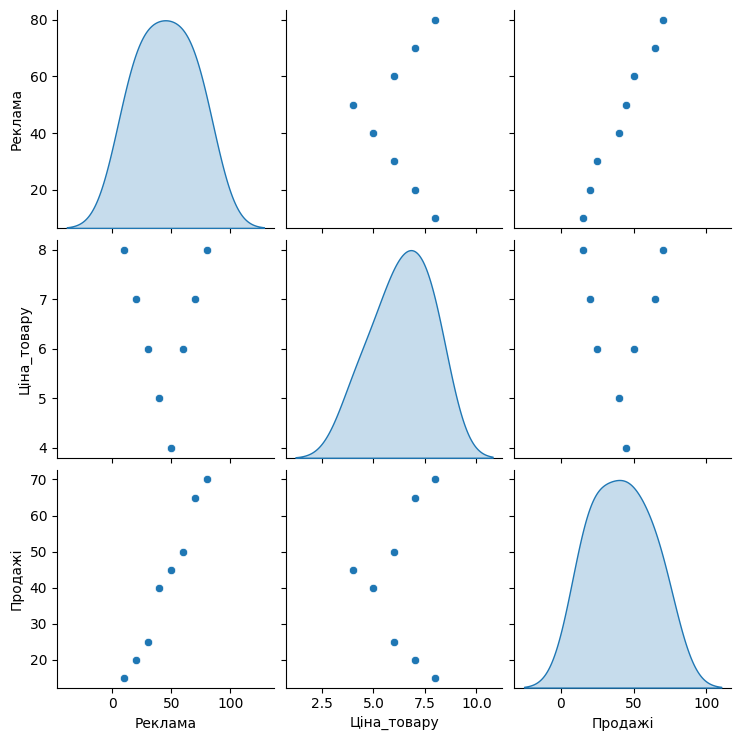


=== Проста регресія ===
Коефіцієнти: [ 0.92857143 -0.85714286]
Intercept: 3.999999999999929
Рівняння: Продажі = 4.00 + (0.93)*Реклама + (-0.86)*Ціна_товару
MSE: 35.37414965986432
R²: 0.8519221642145214


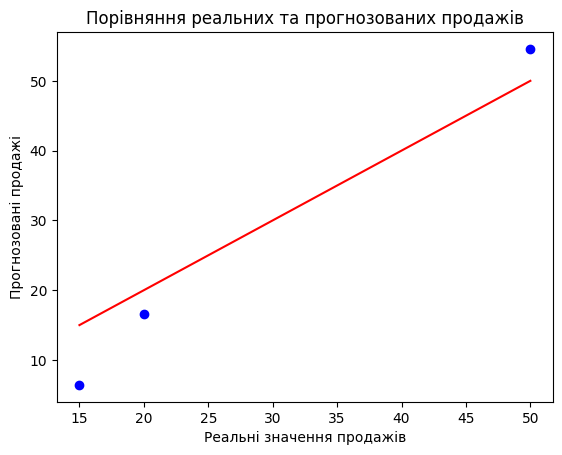


=== Багатофакторна регресія ===

📊 Результати регресійного аналізу:
               Параметр  Нестандартизований коефіцієнт (B)  Стд. помилка  \
0                 const                            12.0015        2.7853   
1  Середня_сума_покупки                            -0.0000        0.0003   
2    Використані_знижки                            -0.0842        0.0776   
3        Час_у_магазині                            -0.0100        0.0146   
4     Кількість_товарів                            -0.0173        0.0766   
5                 Зріст                            -0.0096        0.0150   
6                  Вага                             0.0057        0.0103   

        t  p-значення       VIF  Толерантність  
0  4.3088      0.0000  358.8821         0.0028  
1 -0.1177      0.9064    1.0249         0.9757  
2 -1.0851      0.2786    1.0114         0.9887  
3 -0.6844      0.4942    1.0298         0.9711  
4 -0.2254      0.8218    1.0234         0.9771  
5 -0.6422      0.5211    1.0

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = {
    'Реклама': [10, 20, 30, 40, 50, 60, 70, 80],
    'Ціна_товару': [8, 7, 6, 5, 4, 6, 7, 8],
    'Продажі': [15, 20, 25, 40, 45, 50, 65, 70]
}
df1 = pd.DataFrame(data)

sns.pairplot(df1, diag_kind="kde")
plt.show()

X = df1[['Реклама', 'Ціна_товару']]
y = df1['Продажі']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("\n=== Проста регресія ===")
print("Коефіцієнти:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Рівняння: Продажі = {model.intercept_:.2f} + ({model.coef_[0]:.2f})*Реклама + ({model.coef_[1]:.2f})*Ціна_товару")

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Реальні значення продажів")
plt.ylabel("Прогнозовані продажі")
plt.title("Порівняння реальних та прогнозованих продажів")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

np.random.seed(42)
n = 383
df2 = pd.DataFrame({
    "Частота_відвідувань": np.random.normal(10, 3, n),
    "Середня_сума_покупки": np.random.normal(1500, 500, n),
    "Використані_знижки": np.random.normal(3, 2, n),
    "Час_у_магазині": np.random.normal(30, 10, n),
    "Кількість_товарів": np.random.normal(5, 2, n),
    "Зріст": np.random.normal(170, 10, n),
    "Вага": np.random.normal(70, 15, n),
})

X = df2[["Середня_сума_покупки", "Використані_знижки", "Час_у_магазині", "Кількість_товарів", "Зріст", "Вага"]]
y = df2["Частота_відвідувань"]

X_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_const).fit()

coef_table = pd.DataFrame({
    "Параметр": ols_model.params.index,
    "Нестандартизований коефіцієнт (B)": ols_model.params.values,
    "Стд. помилка": ols_model.bse,
    "t": ols_model.tvalues,
    "p-значення": ols_model.pvalues
})

vif_data = pd.DataFrame()
vif_data["Параметр"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data["Толерантність"] = 1 / vif_data["VIF"]

results_table = coef_table.merge(vif_data, on="Параметр", how="left")

print("\n=== Багатофакторна регресія ===")
print("\n Результати регресійного аналізу:")
print(results_table.round(4))

print("\n Якість моделі:")
print("R-квадрат:", round(ols_model.rsquared, 3))
print("Скоригований R-квадрат:", round(ols_model.rsquared_adj, 3))
print("F-статистика:", round(ols_model.fvalue, 3))
print("p-значення для F:", round(ols_model.f_pvalue, 5))